<a id=""></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">Environment Settings</p>

In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [48]:
### Functions ###

def check(df):
    """
    Generates a concise summary of DataFrame columns, including 
    data type, non-null instances, unique values, null values and duplicates. 

    Parameters:
        df (DataFrame): The Pandas DataFrame to generate the summary for.

    Returns:
        DataFrame: A summary DataFrame containing columns: column, dtype, 
        instances, unique, sum_null and duplicates.
    """
    summary = []
    
    for col in df.columns:
        instances = df[col].count()
        dtypes = df[col].dtype
        unique = df[col].nunique()
        sum_null = df[col].isnull().sum()
        duplicates = df.duplicated().sum()
        summary.append([col, dtypes, instances, unique, sum_null, duplicates])
        
    df_check = pd.DataFrame(summary, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])
    return df_check


def check_unique_values(dataframe, columns):
    """
    Prints unique values for specified columns in a DataFrame.

    Parameters:
        dataframe (DataFrame): The pandas DataFrame to check.
        columns (list): A list of column names for which to print unique values.

    Returns:
        None
    """
    unique_values = {}
    for column in columns:
        unique_values[column] = dataframe[column].unique()
    
    for key, value in unique_values.items():
        print(f"{key}: {value}\n")


def num_var_plots(df, num_column, hue, palette=['#771fa1']):
    """
    Plots various visualizations for a numerical column in a DataFrame.

    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        num_column (str): The name of the numerical column to plot.
        hue (str): The column name to use for grouping or coloring the data.
        palette (list, optional): The color palette to use for the plots. Defaults to ['#771fa1'].

    Returns: None
    """
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Box Plot
    sns.boxplot(data=df,x=num_column, palette=palette, ax=axes[0])
    axes[0].set_title(f'Distribution of {num_column}')
    axes[0].set_xlabel(f'{num_column}')
    axes[0].set_ylabel('Value')

    mean_line = df[num_column].mean()
    axes[0].axvline(mean_line, color='#FF9BD2', linestyle='--', label='Mean')
    axes[0].legend()

    # Violin Plot 
    sns.violinplot(data=df, y=num_column, palette=palette, ax=axes[1])
    axes[1].set_title(f'{num_column}')
    axes[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Histogram by Hue
    my_palette = ['#f5dfe6', '#870931']
    sns.histplot(data=df, x=num_column, hue=hue, kde=True, binwidth=1, multiple='stack', palette=my_palette, ax=axes[0])
    axes[0].set_title(f'{hue} by {num_column}')
    axes[0].set_xlabel(f'{num_column}')
    axes[0].set_ylabel('Count')

    # Violin Plot by Hue
    sns.violinplot(data=df, x=hue, y=num_column, palette=my_palette, ax=axes[1])
    axes[1].set_title(f'{hue} by {num_column}')
    axes[1].set_xlabel(f'{hue}')
    axes[1].set_ylabel(f'{num_column}')

    plt.tight_layout()
    plt.show()

In [49]:
# Adjust display options
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Remove column width limit

<a id=""></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">Datasets</p>

---

# general_data.csv

---

In [50]:
# Load dataset
general_ds = pd.read_csv("datasets\general_data.csv")

# Shape of dataset
print(f"The dataset consists of {general_ds.shape[0]} rows and {general_ds.shape[1]} columns.") 

The dataset consists of 4410 rows and 24 columns.


In [51]:
general_ds.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [52]:
general_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [53]:
check(general_ds)

,column,dtype,instances,unique,sum_null,duplicates
0,Age,int64,4410,43,0,0
1,Attrition,object,4410,2,0,0
2,BusinessTravel,object,4410,3,0,0
3,Department,object,4410,3,0,0
4,DistanceFromHome,int64,4410,29,0,0
5,Education,int64,4410,5,0,0
6,EducationField,object,4410,6,0,0
7,EmployeeCount,int64,4410,1,0,0
8,EmployeeID,int64,4410,4410,0,0
9,Gender,object,4410,2,0,0


In [54]:
general_ds = general_ds.drop(columns=['Over18', 'EmployeeCount', 'EmployeeID', 'StandardHours'])

In [55]:
# Select numerical columns
num_columns = general_ds.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select categorical columns
cat_columns = general_ds.select_dtypes(include=['object']).columns.tolist()

# print("Numerical Columns:", num_columns)
# print("Categorical Columns:", cat_columns)

In [56]:
general_ds.describe().round(3)

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000,4410.000,4410.000,4410.000,4410.000,4391.000,4410.000,4410.000,4401.000,4410.000,4410.000,4410.000,4410.000
mean,36.924,9.193,2.913,2.064,65029.313,2.695,15.210,0.794,11.280,2.799,7.008,2.188,4.123
std,9.133,8.105,1.024,1.107,47068.889,2.499,3.659,0.852,7.782,1.289,6.125,3.222,3.567
min,18.000,1.000,1.000,1.000,10090.000,0.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,30.000,2.000,2.000,1.000,29110.000,1.000,12.000,0.000,6.000,2.000,3.000,0.000,2.000
50%,36.000,7.000,3.000,2.000,49190.000,2.000,14.000,1.000,10.000,3.000,5.000,1.000,3.000
75%,43.000,14.000,4.000,3.000,83800.000,4.000,18.000,1.000,15.000,3.000,9.000,3.000,7.000
max,60.000,29.000,5.000,5.000,199990.000,9.000,25.000,3.000,40.000,6.000,40.000,15.000,17.000


In [57]:
check_unique_values(general_ds, general_ds.columns)

Age: [51 31 32 38 46 28 29 25 45 36 55 47 37 21 35 26 50 53 42 44 49 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]

Attrition: ['No' 'Yes']

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department: ['Sales' 'Research & Development' 'Human Resources']

DistanceFromHome: [ 6 10 17  2  8 11 18  1  7 28 14  3  4 16  9  5 20 29 15 13 24 19 22 25
 21 26 27 12 23]

Education: [2 1 4 5 3]

EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender: ['Female' 'Male']

JobLevel: [1 4 3 2 5]

JobRole: ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

MaritalStatus: ['Married' 'Single' 'Divorced']

MonthlyIncome: [131160  41890 193280 ...  37020  23980  54680]

NumCompaniesWorked: [ 1.  0.  3.  4.  2.  7.  9.  5.  6.  8. nan]

PercentSalaryHike: [11 23 15 12 13 20

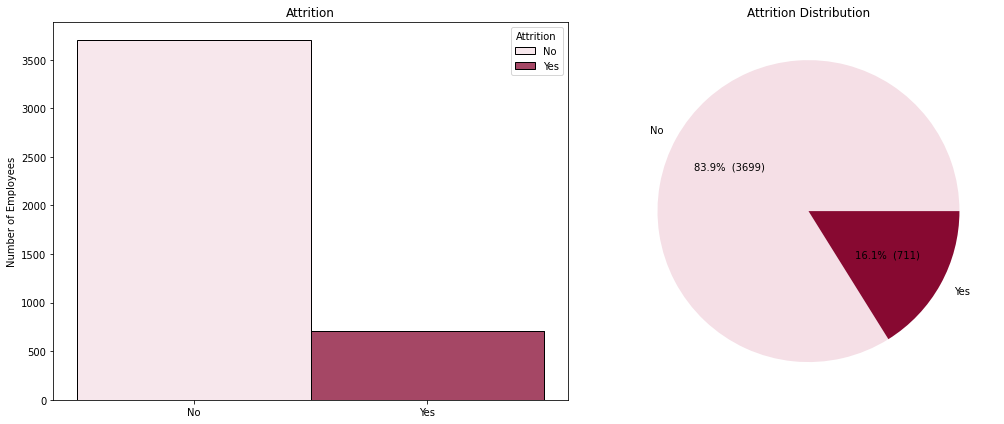

In [58]:
            ### Attrition ###

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Attrition
my_palette = ['#f5dfe6', '#870931']
general_ds['JobInvolvement'] = general_ds['Attrition']
sns.histplot(data=general_ds, x='Attrition', hue= 'Attrition', multiple='stack', palette=my_palette, ax=ax[0])
ax[0].set_title('Attrition')
ax[0].set_xlabel('')
ax[0].set_ylabel('Number of Employees')

# Pie Chart for Attrition
ax[1].set_title('Attrition Distribution')
attrition_counts = general_ds['Attrition'].value_counts()
attrition_counts.plot(kind='pie', autopct=lambda p: '{:.1f}%  ({:.0f})'.format(p, p * sum(attrition_counts) / 100), colors=my_palette, ax=ax[1])
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

general_ds['Attrition_Num'] = general_ds['Attrition'].apply(lambda x:1 if x=='Yes' else 0)

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Attrition Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>attrition rate is approximately 16.12%</b>, with a <b>standard deviation of 36.78%</b>, indicating <b>some variability</b> in attrition rates across the dataset.</li>
    <br>
    <li>The attrition rate can be calculated as the proportion of employees who have left the company compared to the total number of employees.</li>
    <br>
    <li>The majority of employees in the dataset (3699 out of 4410) have the value "No" for attrition, indicating that they have not left the company.</li>
    <br>
</ul>
</div>


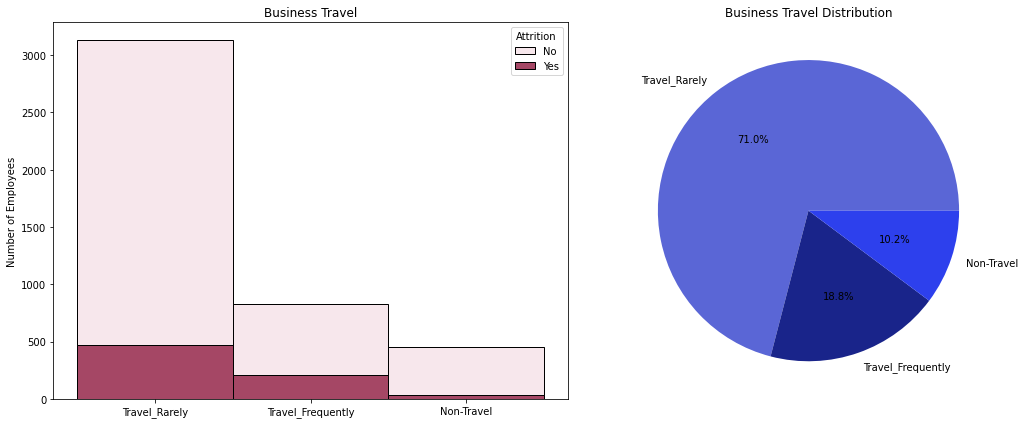

In [59]:
            ### Business Travel ###

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Attrition
palette = ['#5a66d6', '#19248a', '#2d40ed']
sns.histplot(data=general_ds, x='BusinessTravel', hue= 'Attrition', multiple='stack', palette=my_palette, ax=ax[0])
ax[0].set_title('Business Travel')
ax[0].set_xlabel('')
ax[0].set_ylabel('Number of Employees')

# Pie Chart for Attrition
ax[1].set_title('Business Travel Distribution')
general_ds['BusinessTravel'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=palette, ax=ax[1])
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Business Travel Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average frequency of business travel is approximately 1.09</b>, with a <b>standard deviation of 0.53</b>, indicating <b>some variability</b> in employees' business travel frequency.</li>
    <br>
    <li>The <b>minimum frequency of business travel of 0</b> suggests that some employees do not travel for business, while the <b>maximum of 2</b> indicates employees who travel frequently for business.</li>
    <br>
    <li>Quartile information shows that <b>75% of employees have a business travel frequency of 1 or less</b>, indicating that the majority of employees either do not travel for business or do so rarely.</li>
</ul>
</div>


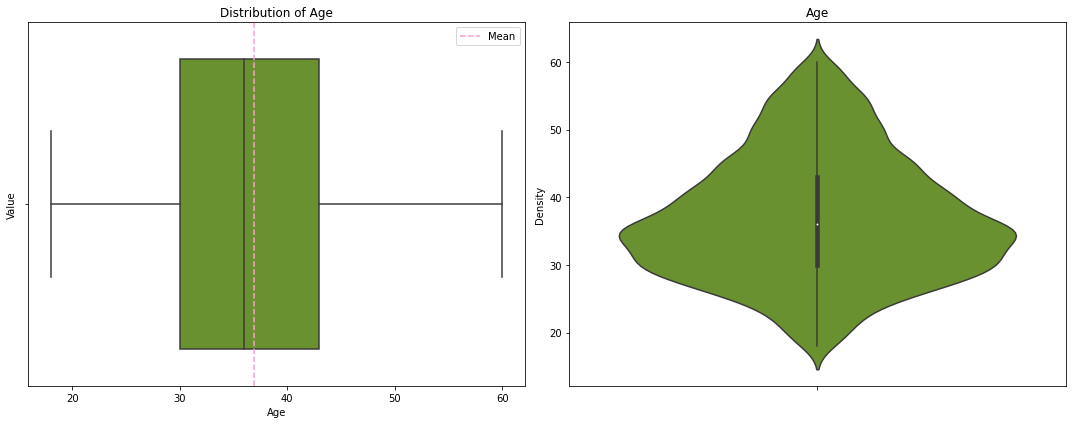

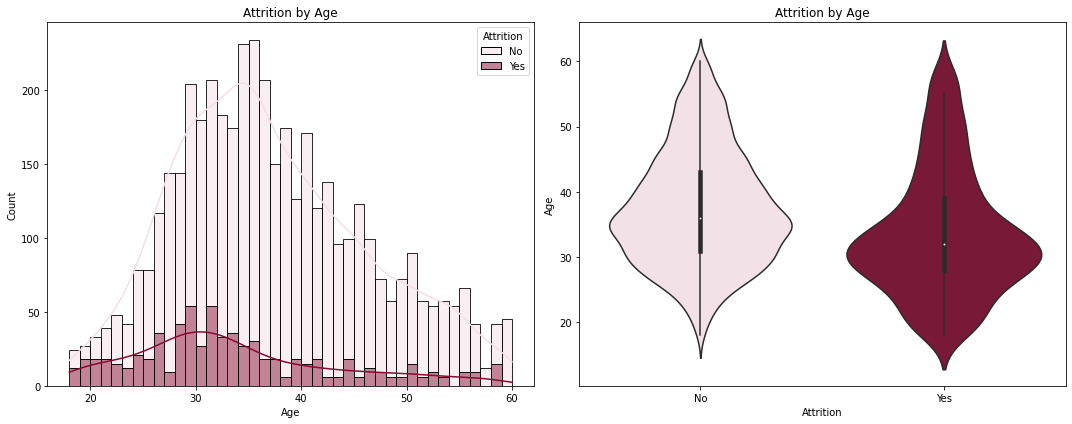

In [60]:
            ### Age ###
num_var_plots(df=general_ds, num_column='Age', hue='Attrition', palette=['#6da11f'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Age Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average age is approximately 36.92 years</b>, with a <b>standard deviation of 9.13 years</b>, indicating <b>moderate variability</b> in ages.</li>
    <br>
    <li>The <b>minimum age is 18 years</b>, while the <b>maximum age is 60 years</b>, reflecting a <b>wide range of age groups</b> within the workforce.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees fall within the age range of 30 to 43 years</b>.</li>
</ul>
</div>

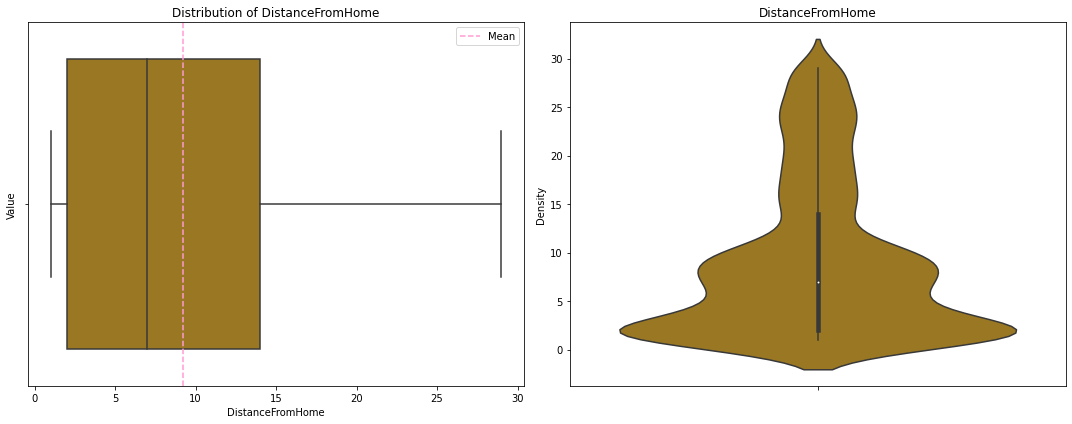

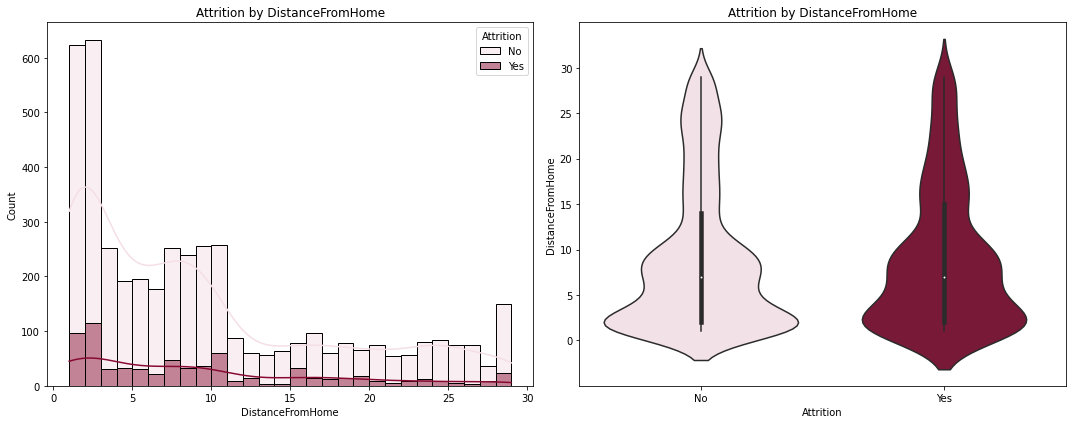

In [61]:
            ### Distance From Home ###
num_var_plots(df=general_ds, num_column='DistanceFromHome', hue='Attrition', palette=['#ad7f0f'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Distance From Home Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average distance from home is approximately 9.19 km</b>, with a <b>standard deviation of 8.11 km</b>, indicating <b>some variability</b> in the commuting distances of employees.</li>
    <br>
    <li>The <b>minimum distance is 1 km</b>, while the <b>maximum distance is 29 km</b>, reflecting a <b>diverse range of commuting distances</b> among employees.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees have a commuting distance between 2 km and 14 km</b>. Understanding commuting distances can be important for workforce planning and employee satisfaction initiatives.</li>
</ul>
</div>

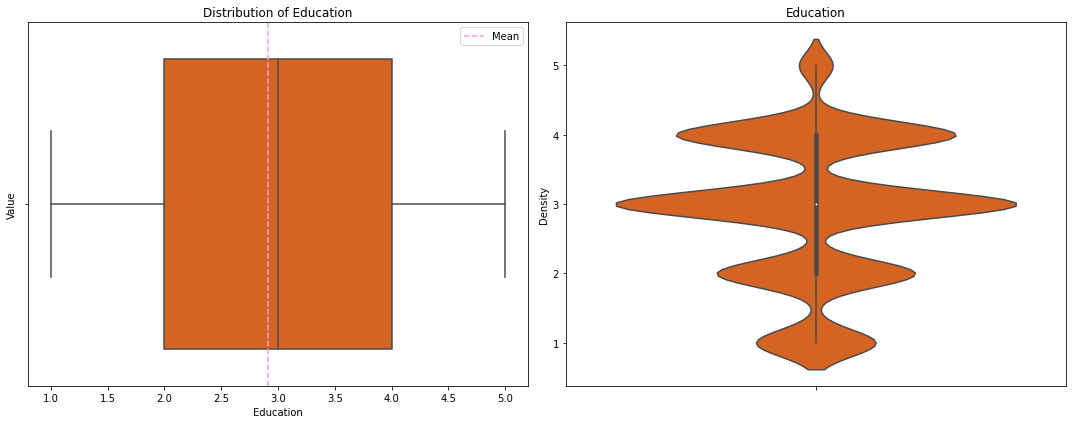

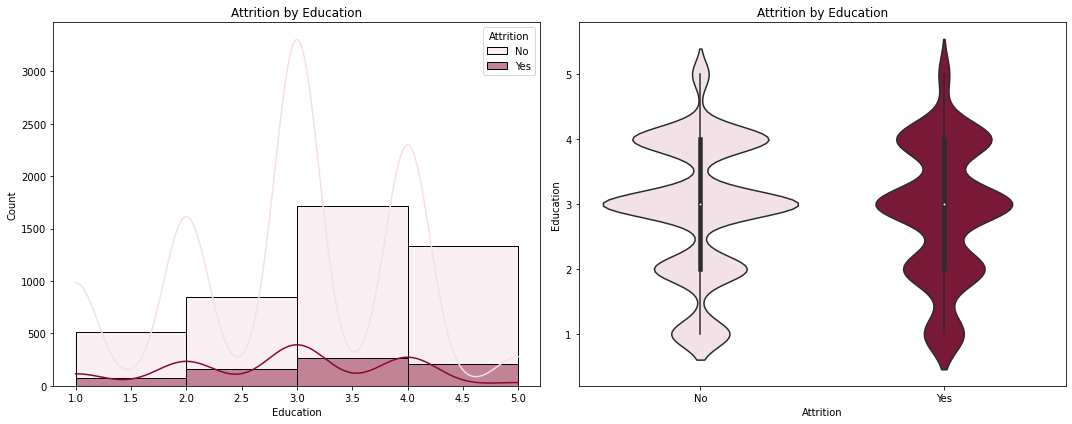

In [62]:
            ### Education ###
num_var_plots(df=general_ds, num_column='Education', hue='Attrition', palette=['#f25c05'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Education Level Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average education level is approximately 2.91</b>, with a <b>standard deviation of 1.02</b>, indicating <b>moderate variability</b> in employees' education levels.</li>
    <br>
    <li>The <b>minimum education level of 1</b> suggests that some employees have education below college, while the <b>maximum of 5</b> indicates employees with a doctorate degree.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees have at least a bachelor's degree</b>.</li>
</ul>
</div>



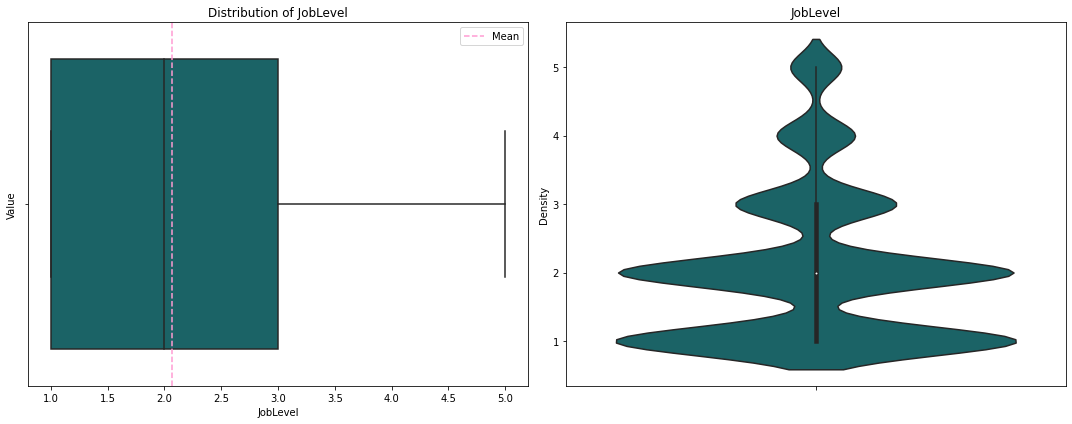

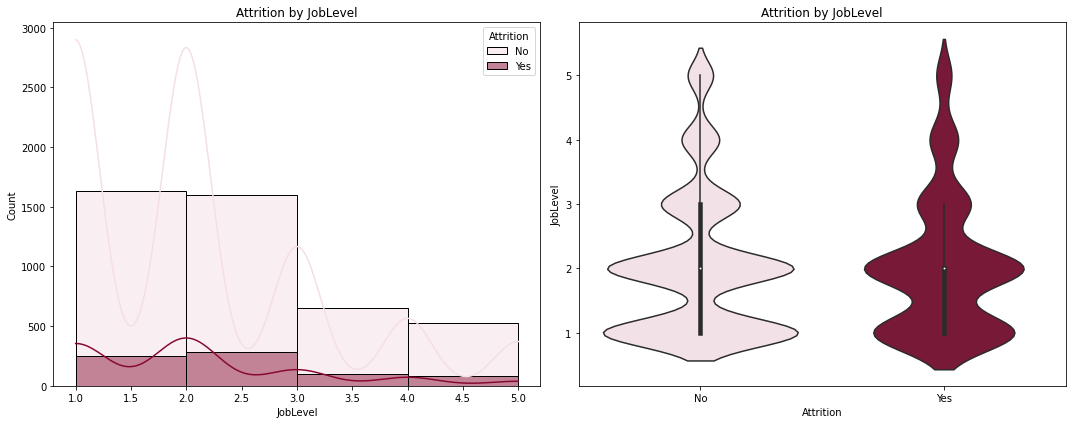

In [63]:
            ### Job Level ###
num_var_plots(df=general_ds, num_column='JobLevel', hue='Attrition', palette=['#0e6f72'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Job Level Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average job level is approximately 2.06</b>, with a <b>standard deviation of 1.11</b>, indicating <b>moderate variability</b> in employees' job levels.</li>
    <br>
    <li>The <b>minimum job level of 1</b> suggests that some employees are at the lowest job level, while the <b>maximum of 5</b> indicates employees at the highest job level.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees are at job level 2 or lower</b>.</li>
</ul>
</div>


In [64]:
            ### Monthly Income ###
# num_var_plots(df=general_ds, num_column='MonthlyIncome', hue='Attrition', palette=['#ff5733'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Monthly Income Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average monthly income is approximately 65,029.31 rupees</b>, with a <b>standard deviation of 47,068.89 rupees</b>, indicating <b>considerable variability</b> in income levels among employees.</li>
    <br>
    <li>The <b>minimum monthly income is 10,090 rupees</b>, while the <b>maximum monthly income is 199,990 rupees</b>, reflecting a <b>wide range of income levels</b> within the workforce.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees earn between 29,110 and 83,800 rupees per month</b>.</li>
</ul>
</div>


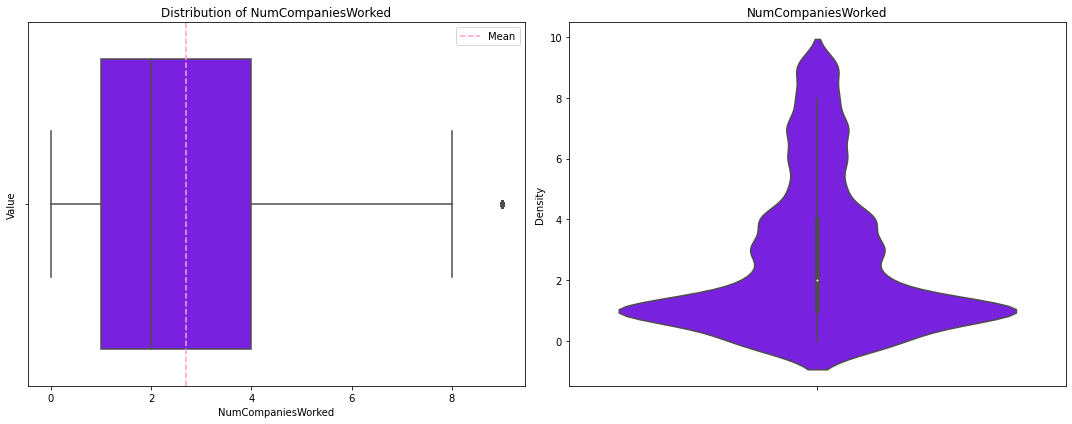

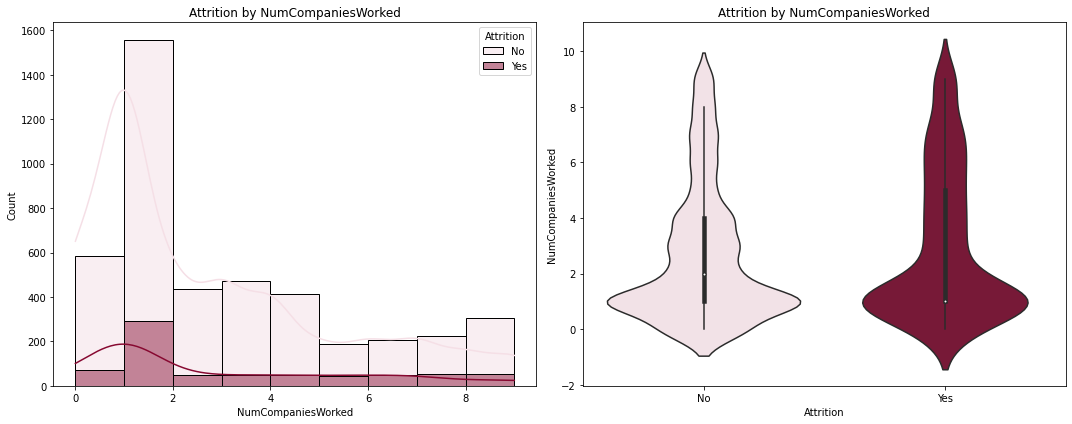

In [65]:
            ### Number Companies Worked ###
num_var_plots(df=general_ds, num_column='NumCompaniesWorked', hue='Attrition', palette=['#7502ff'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Number of Companies Worked Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average number of companies worked is approximately 2.69</b>, with a <b>standard deviation of 2.49</b>, indicating <b>moderate variability</b> in the number of companies employees have worked for.</li>
    <br>
    <li>The <b>minimum value of 0</b> indicates that some employees have not worked for any other companies before, while the <b>maximum value of 9</b> indicates employees who have worked for up to 9 different companies.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees have worked for between 1 and 4 companies</b>.</li>
</ul>
</div>


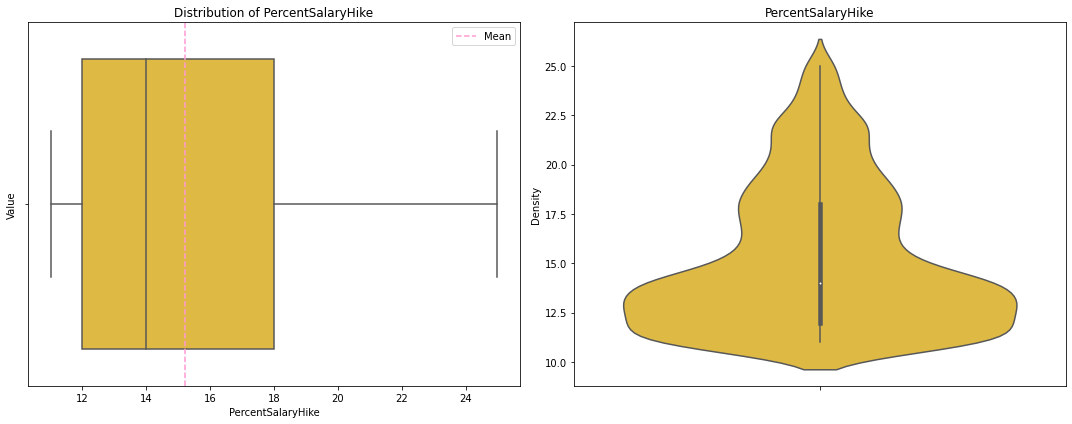

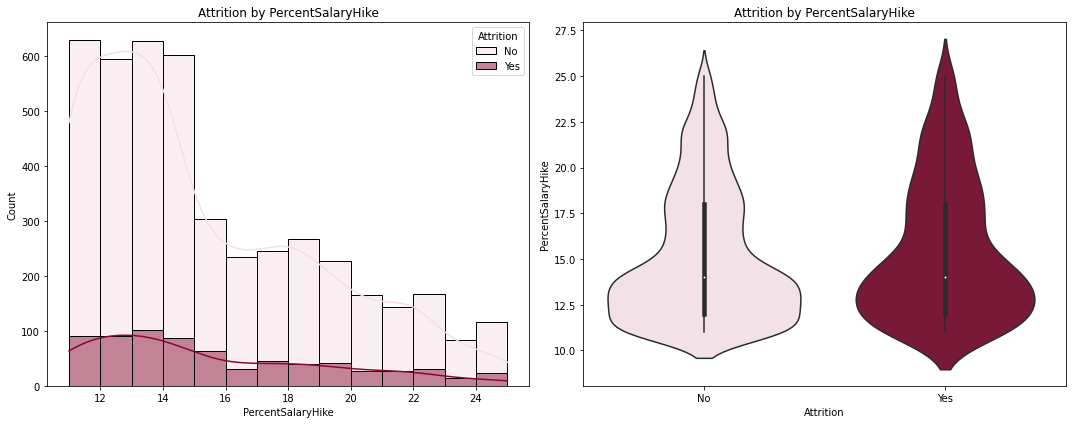

In [66]:
            ### Percent Salary Hike ###
num_var_plots(df=general_ds, num_column='PercentSalaryHike', hue='Attrition', palette=['#f7c82c'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Percent Salary Hike Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average percent salary hike is approximately 15.21%</b>, with a <b>standard deviation of 3.66%</b>, indicating <b>some variability</b> in salary increase rates among employees.</li>
    <br>
    <li>The <b>minimum salary hike of 11%</b> suggests the lowest increment rate offered to employees, while the <b>maximum salary hike of 25%</b> represents the highest increment rate.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees received a salary hike between 12% and 18%</b>.</li>
</ul>
</div>


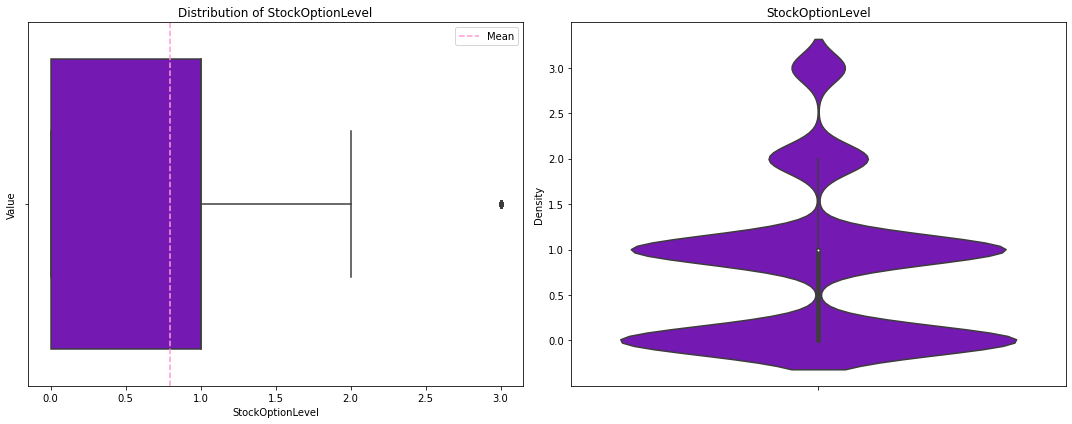

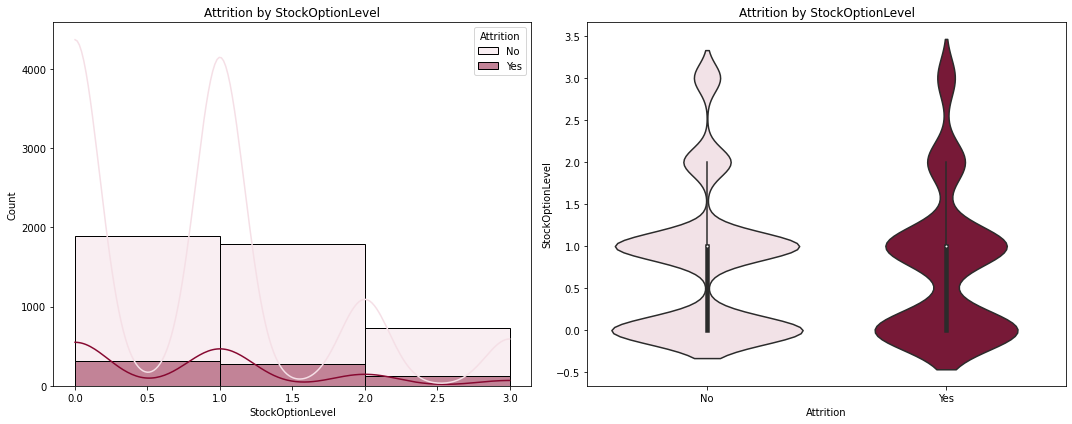

In [67]:
            ### Stock Option Level ###
num_var_plots(df=general_ds, num_column='StockOptionLevel', hue='Attrition', palette=['#7a00cc'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Stock Option Level Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average stock option level is approximately 0.79</b>, with a <b>standard deviation of 0.85</b>, indicating <b>some variability</b> in the distribution of stock options among employees.</li>
    <br>
    <li>The <b>minimum stock option level of 0</b> suggests that some employees may not have stock options, while the <b>maximum stock option level of 3</b> indicates employees with the highest level of stock options.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees have a stock option level of 1 or higher</b>.</li>
</ul>
</div>


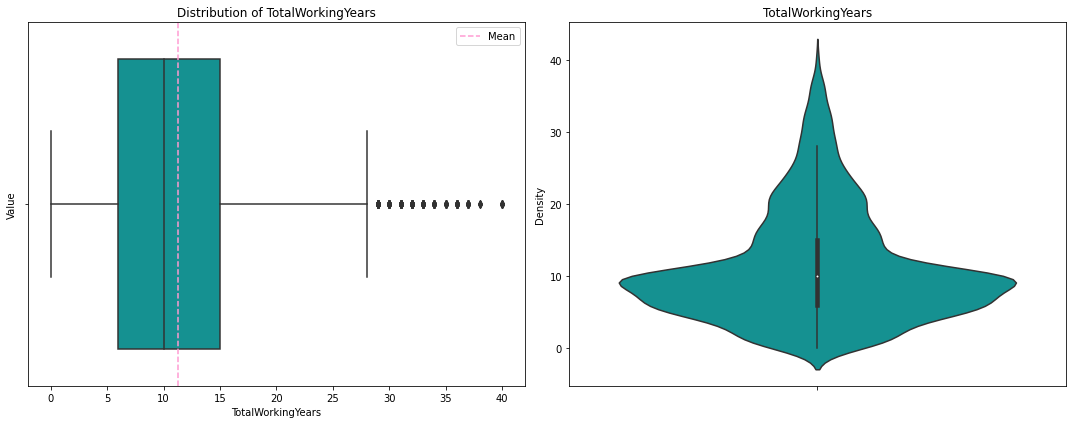

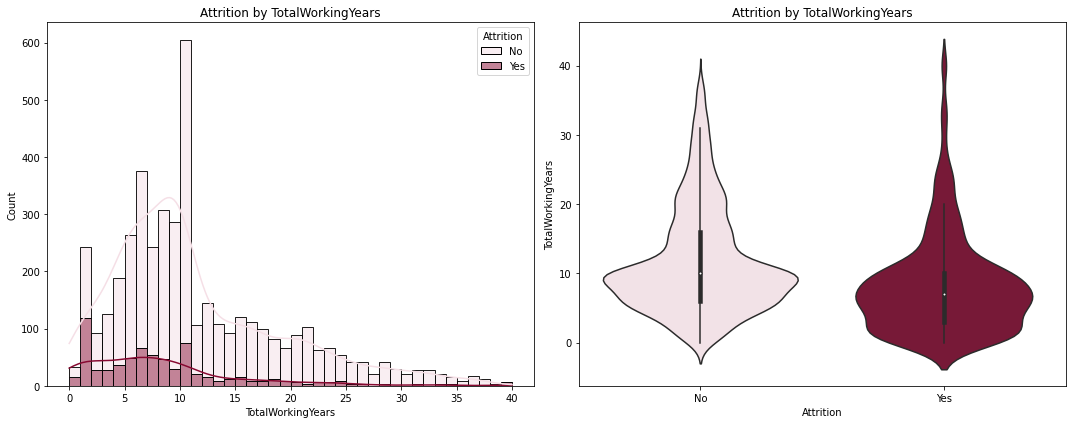

In [68]:
            ### Total Working Years ###
num_var_plots(df=general_ds, num_column='TotalWorkingYears', hue='Attrition', palette=['#00a6a6'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Total Working Years Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average total working years is approximately 11.28 years</b>, with a <b>standard deviation of 7.77 years</b>, indicating <b>some variability</b> in the length of employees' careers.</li>
    <br>
    <li>The <b>minimum total working years of 0</b> suggests that some employees may be new to the workforce, while the <b>maximum total working years of 40</b> indicates employees with extensive work experience.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees have between 6 and 15 years of total working experience</b>.</li>
</ul>
</div>


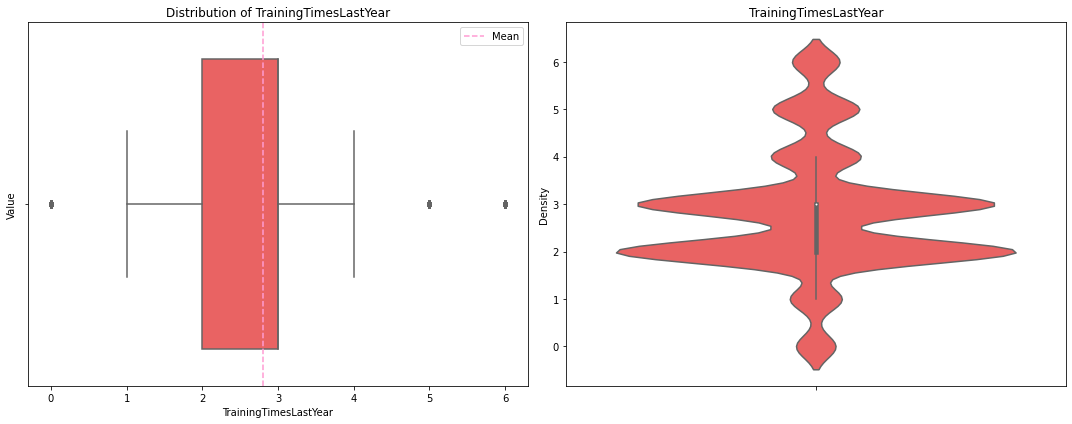

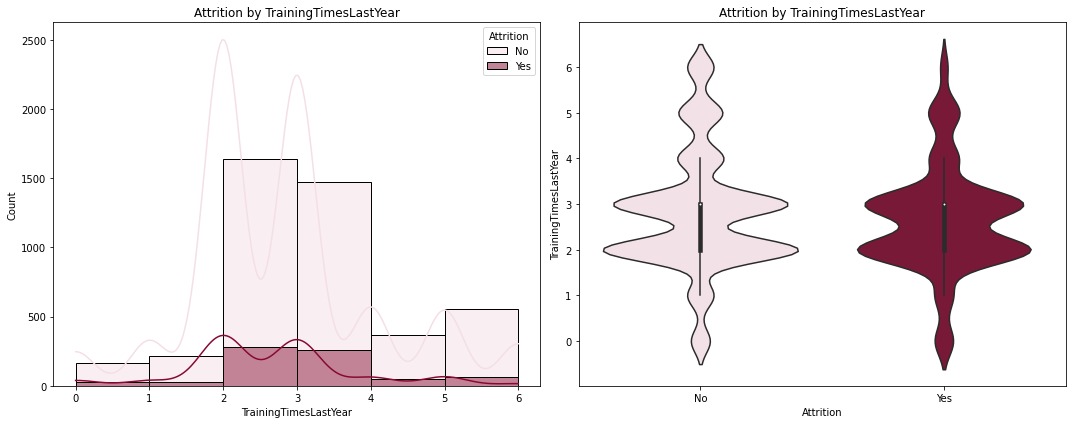

In [69]:
            ### Training Times Last Year ###
num_var_plots(df=general_ds, num_column='TrainingTimesLastYear', hue='Attrition', palette=['#ff4d4d'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Training Times Last Year Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average number of training times last year is approximately 2.80</b>, with a <b>standard deviation of 1.29</b>, indicating <b>some variability</b> in the frequency of training among employees.</li>
    <br>
    <li>The <b>minimum number of training times last year of 0</b> suggests that some employees may not have undergone any training, while the <b>maximum of 6</b> indicates employees who have received training on multiple occasions.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees underwent training 3 or more times last year</b>.</li>
</ul>
</div>


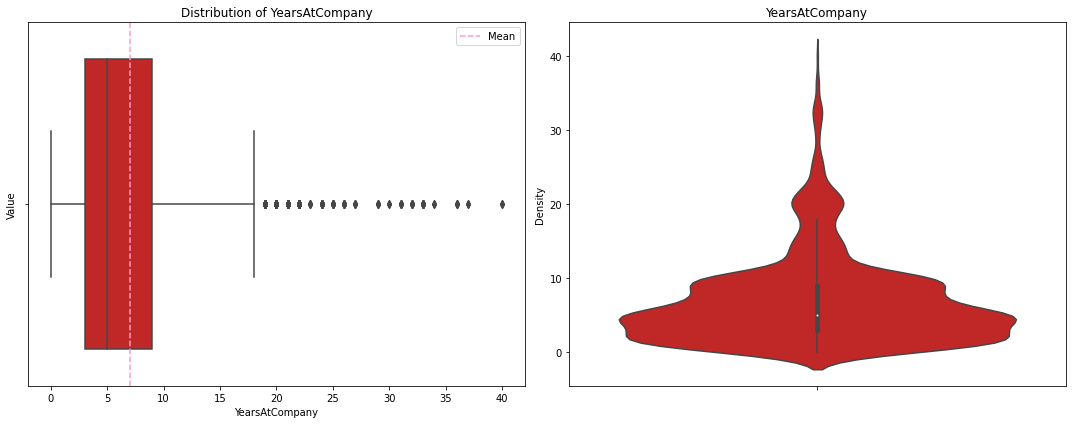

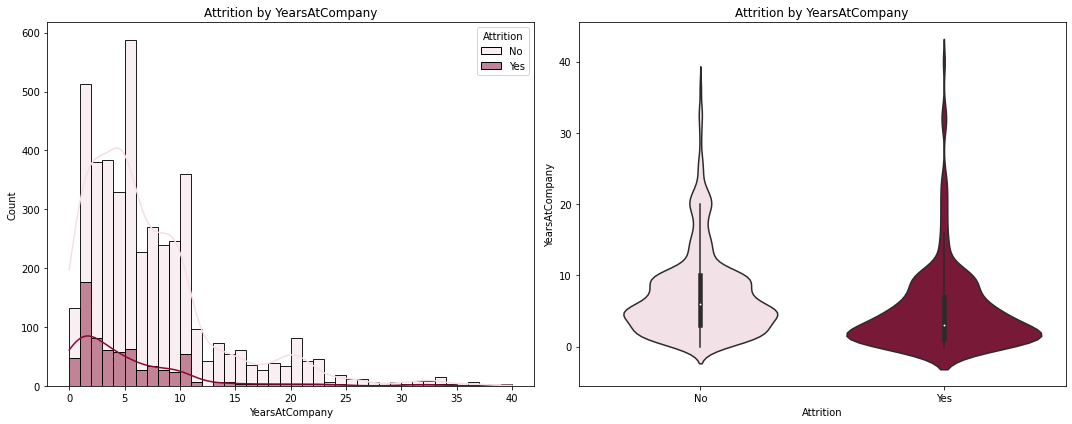

In [70]:
            ### Years At Company ###
num_var_plots(df=general_ds, num_column='YearsAtCompany', hue='Attrition', palette=['#d90f0f'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Years at Company Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average number of years at the company is approximately 7.01</b>, with a <b>standard deviation of 6.13</b>, indicating <b>some variability</b> in the length of employees' tenure.</li>
    <br>
    <li>The <b>minimum number of years at the company of 0</b> suggests that some employees may be new hires, while the <b>maximum of 40</b> indicates employees with long-standing tenure.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees have been with the company for 5 to 9 years</b>.</li>
</ul>
</div>


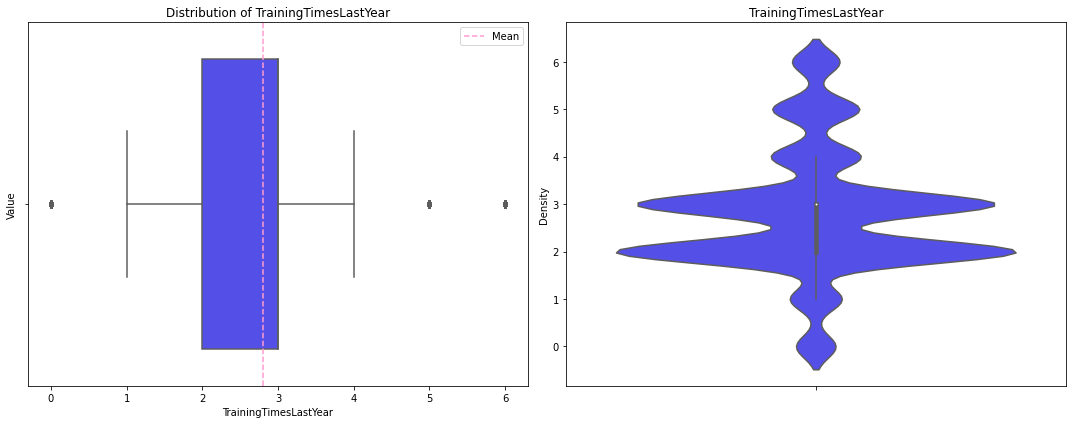

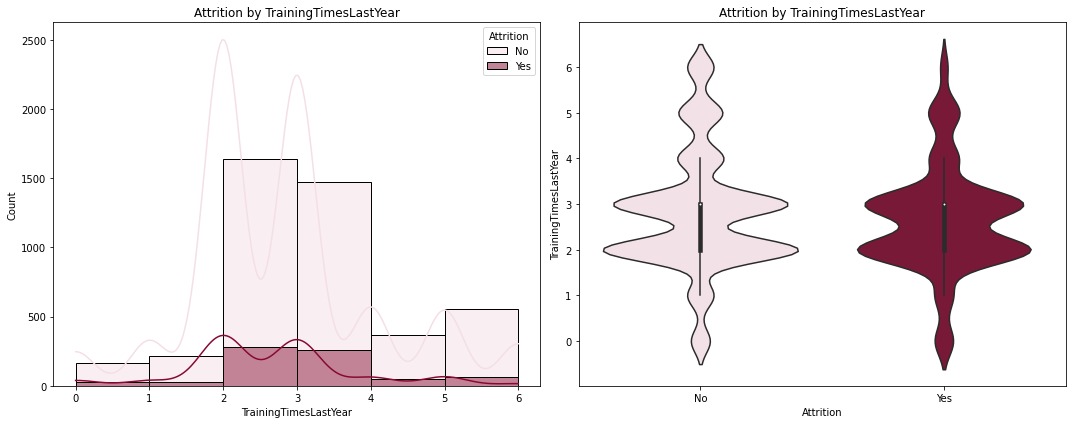

In [71]:
            ### Years Since Last Promotion ###
num_var_plots(df=general_ds, num_column='TrainingTimesLastYear', hue='Attrition', palette=['#3d36ff'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Years Since Last Promotion Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average number of years since the last promotion is approximately 2.19</b>, with a <b>standard deviation of 3.22</b>, indicating <b>considerable variability</b> in the time elapsed since employees' last promotion.</li>
    <br>
    <li>The <b>minimum number of years since the last promotion of 0</b> suggests that some employees may have been recently promoted, while the <b>maximum of 15</b> indicates employees who have not been promoted for a long time.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees have experienced a promotion within the last 3 years</b>.</li>
</ul>
</div>


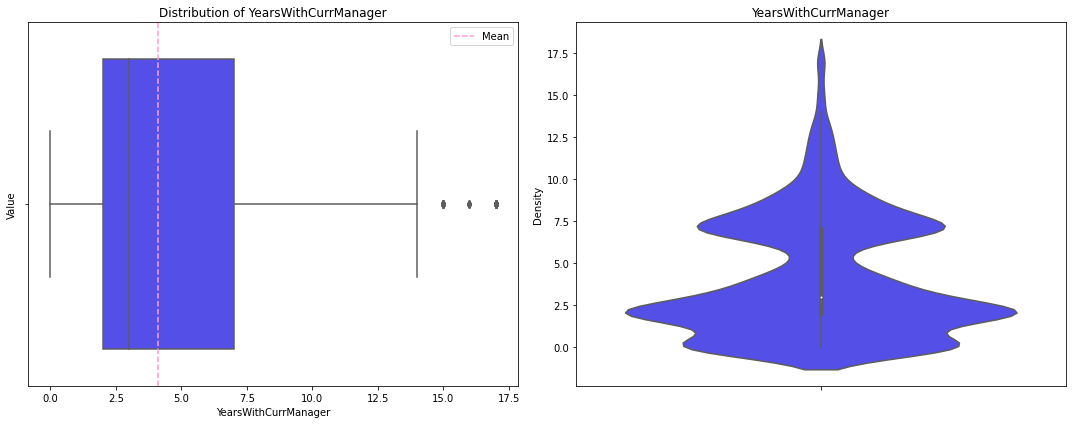

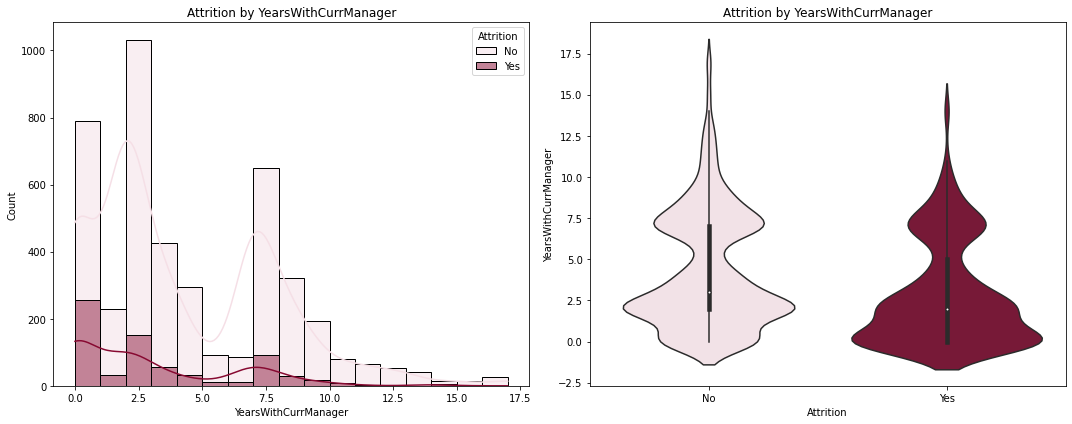

In [72]:
            ### Years With Current Manager ###
num_var_plots(df=general_ds, num_column='YearsWithCurrManager', hue='Attrition', palette=['#3d36ff'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Years With Current Manager Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average number of years with the current manager is approximately 4.12</b>, with a <b>standard deviation of 3.57</b>, indicating <b>some variability</b> in the length of time employees have been with their current manager.</li>
    <br>
    <li>The <b>minimum number of years with the current manager of 0</b> suggests that some employees may have recently started working with their current manager, while the <b>maximum of 17</b> indicates employees who have had the same manager for a long time.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees have been with their current manager for 3 to 7 years</b>.</li>
</ul>
</div>


---

# employee_survey_data.csv

---

In [73]:
# Load dataset
emp_survey_ds = pd.read_csv("datasets\employee_survey_data (1).csv")

# Shape of dataset
print(f"The dataset consists of {emp_survey_ds.shape[0]} rows and {emp_survey_ds.shape[1]} columns.") 

The dataset consists of 4410 rows and 4 columns.


In [74]:
emp_survey_ds.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [75]:
emp_survey_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [76]:
check(emp_survey_ds)

,column,dtype,instances,unique,sum_null,duplicates
0,EmployeeID,int64,4410,4410,0,0
1,EnvironmentSatisfaction,float64,4385,4,25,0
2,JobSatisfaction,float64,4390,4,20,0
3,WorkLifeBalance,float64,4372,4,38,0


In [77]:
emp_survey_ds.describe().round(3)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000,4385.000,4390.000,4372.000
mean,2205.500,2.724,2.728,2.761
std,1273.202,1.093,1.101,0.706
min,1.000,1.000,1.000,1.000
25%,1103.250,2.000,2.000,2.000
50%,2205.500,3.000,3.000,3.000
75%,3307.750,4.000,4.000,3.000
max,4410.000,4.000,4.000,4.000


In [78]:
columns_to_check = ['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']
check_unique_values(emp_survey_ds, columns_to_check)

JobSatisfaction: [ 4.  2.  1.  3. nan]

EnvironmentSatisfaction: [ 3.  2.  4.  1. nan]

WorkLifeBalance: [ 2.  4.  1.  3. nan]



In [79]:
emp_survey_ds.fillna(0, inplace=True)

In [80]:
emp_survey_ds.describe().round(3)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000,4410.000,4410.000,4410.000
mean,2205.500,2.708,2.716,2.738
std,1273.202,1.109,1.114,0.748
min,1.000,0.000,0.000,0.000
25%,1103.250,2.000,2.000,2.000
50%,2205.500,3.000,3.000,3.000
75%,3307.750,4.000,4.000,3.000
max,4410.000,4.000,4.000,4.000


In [81]:
ds = pd.read_csv("datasets\general_data.csv")
emp_survey_ds =pd.merge(emp_survey_ds, ds,  on='EmployeeID', how='inner')

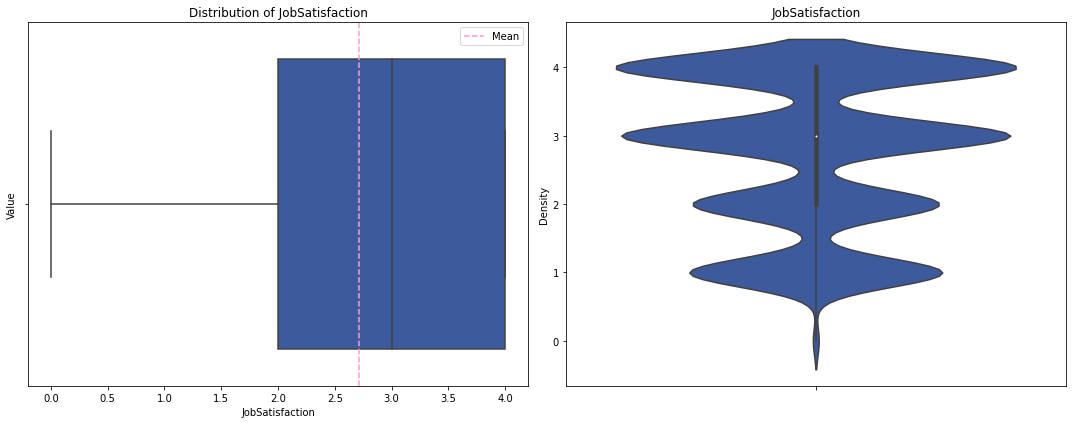

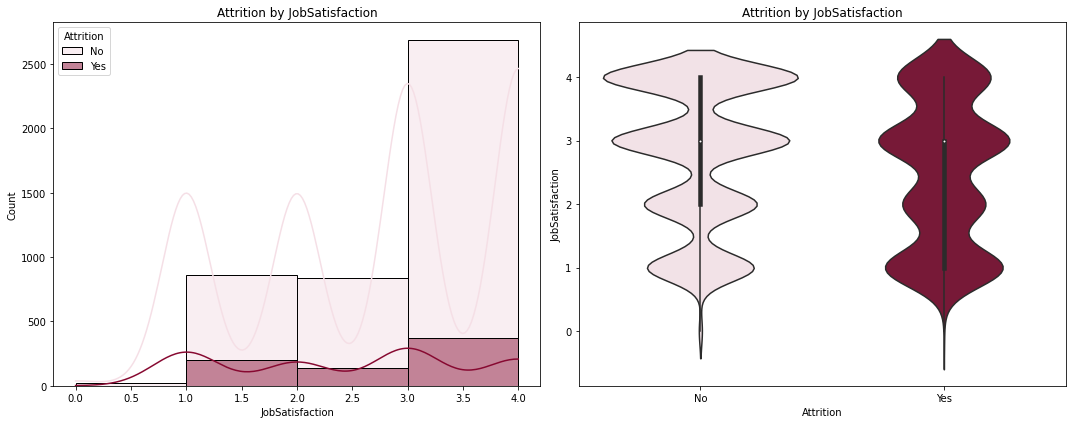

In [82]:
num_var_plots(df=emp_survey_ds, num_column='JobSatisfaction', hue='Attrition', palette=['#2d54ad'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Job Satisfaction Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average job satisfaction level is approximately 2.73</b>, with a <b>standard deviation of 1.10</b>, indicating <b>moderate variability</b> in employees' job satisfaction levels.</li>
    <br>
    <li>The <b>minimum job satisfaction level of 1</b> suggests that some employees have low job satisfaction, while the <b>maximum of 4</b> indicates employees with very high job satisfaction.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees have a job satisfaction level between medium and high</b>. Understanding employees' job satisfaction levels is essential for assessing overall employee morale, retention strategies, and organizational culture.</li>
</ul>
</div>


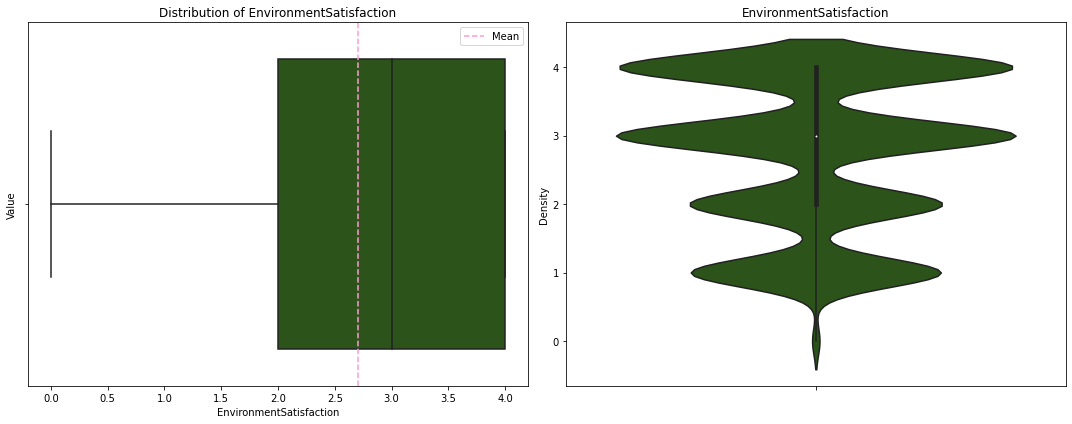

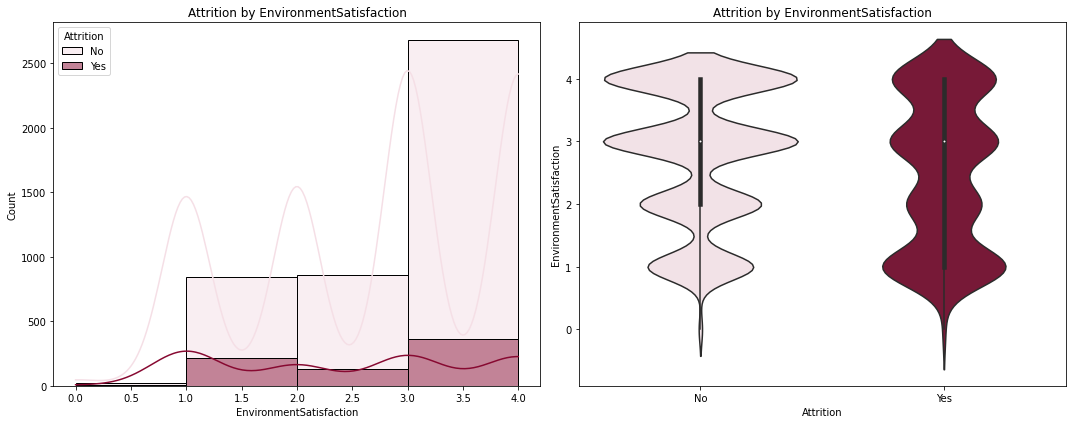

In [83]:
num_var_plots(df=emp_survey_ds, num_column='EnvironmentSatisfaction', hue='Attrition', palette=['#275c11'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Environment Satisfaction Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average environment satisfaction level is approximately 2.73</b>, with a <b>standard deviation of 1.09</b>, indicating <b>moderate variability</b> in employees' satisfaction with their work environment.</li>
    <br>
    <li>The <b>minimum environment satisfaction level of 1</b> suggests that some employees have low satisfaction with their work environment, while the <b>maximum of 4</b> indicates employees with very high satisfaction.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees have a work environment satisfaction level between medium and high</b>.</li>
</ul>
</div>


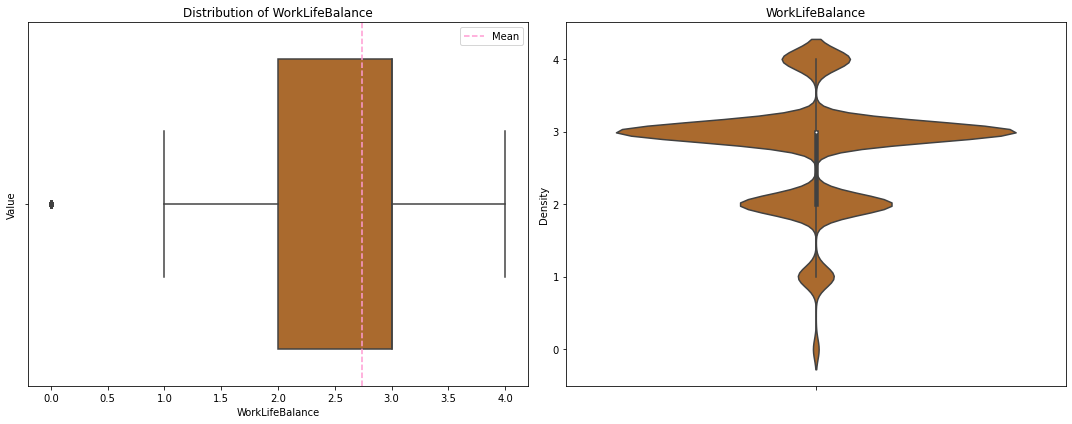

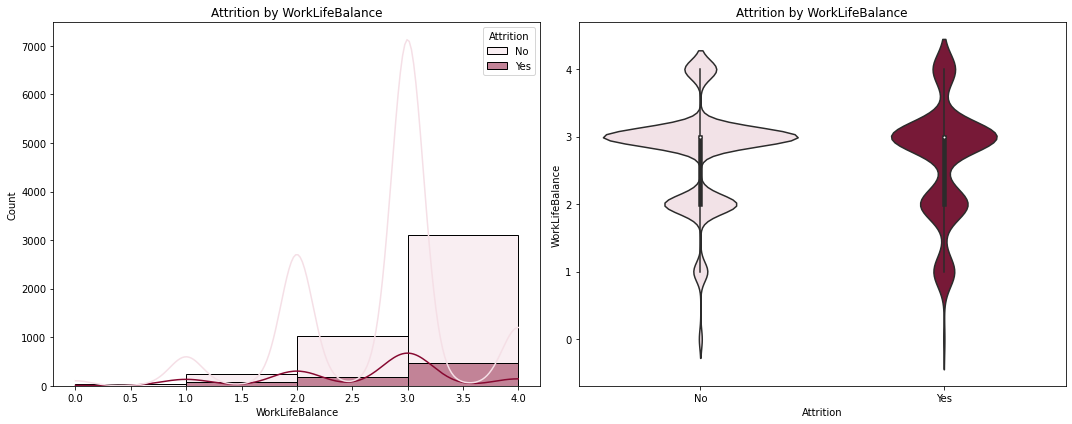

In [84]:
num_var_plots(df=emp_survey_ds, num_column='WorkLifeBalance', hue='Attrition', palette=['#bf6919'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Work-Life Balance Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average work-life balance level is approximately 2.76</b>, with a <b>standard deviation of 0.70</b>, indicating <b>moderate variability</b> in employees' perception of their work-life balance.</li>
    <br>
    <li>The <b>minimum work-life balance level of 1</b> suggests that some employees perceive their work-life balance as bad, while the <b>maximum of 4</b> indicates employees who perceive their work-life balance as best.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees perceive their work-life balance as good or better</b>. Understanding employees' perception of work-life balance is essential for promoting employee well-being, reducing burnout, and enhancing overall job satisfaction.</li>
</ul>
</div>


---

# manager_survey_data.csv

---

In [85]:
# Load dataset
mng_survey_ds = pd.read_csv("datasets\manager_survey_data (1).csv")

# Shape of dataset
print(f"The dataset consists of {mng_survey_ds.shape[0]} rows and {mng_survey_ds.shape[1]} columns.") 

The dataset consists of 4410 rows and 3 columns.


In [86]:
mng_survey_ds.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [87]:
mng_survey_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [88]:
check(mng_survey_ds)

,column,dtype,instances,unique,sum_null,duplicates
0,EmployeeID,int64,4410,4410,0,0
1,JobInvolvement,int64,4410,4,0,0
2,PerformanceRating,int64,4410,2,0,0


In [89]:
mng_survey_ds.describe().round(3)

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000,4410.000,4410.000
mean,2205.500,2.730,3.154
std,1273.202,0.711,0.361
min,1.000,1.000,3.000
25%,1103.250,2.000,3.000
50%,2205.500,3.000,3.000
75%,3307.750,3.000,3.000
max,4410.000,4.000,4.000


In [90]:
mng_survey_ds =pd.merge(mng_survey_ds, emp_survey_ds, on='EmployeeID', how='inner')

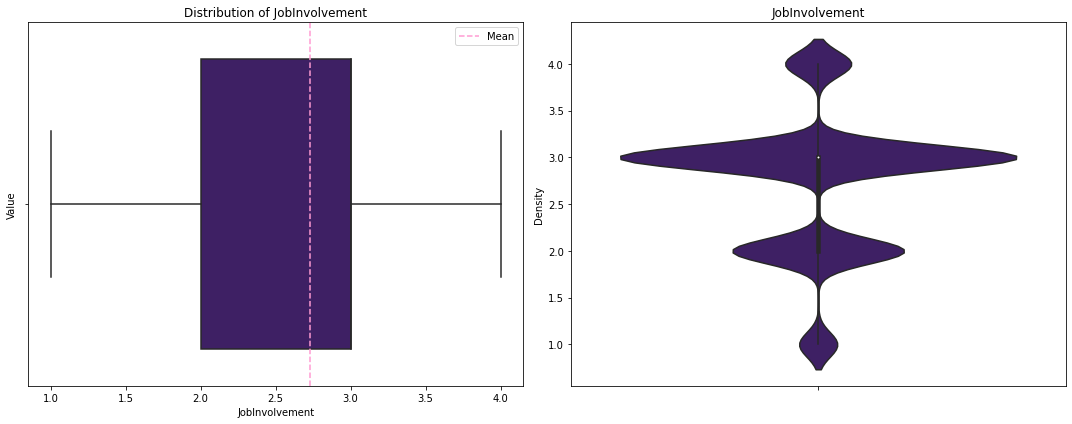

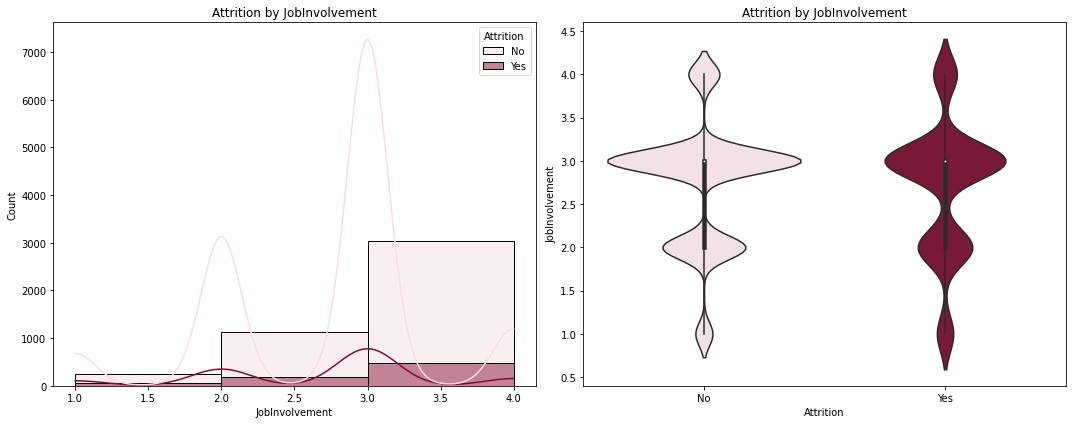

In [91]:
            ### Job Involvement ###
num_var_plots(df=mng_survey_ds, num_column='JobInvolvement', hue='Attrition', palette=['#3c1470'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Job Involvement Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average job involvement level is approximately 2.73</b>, with a <b>standard deviation of 0.71</b>, indicating <b>moderate variability</b> in employees' level of involvement in their jobs.</li>
    <br>
    <li>The <b>minimum job involvement level of 1</b> suggests that some employees have low involvement in their job, while the <b>maximum of 4</b> indicates employees with very high involvement.</li>
    <br>
    <li>Quartile information shows that <b>50% of employees have a job involvement level of high or very high</b>. Understanding employees' job involvement is crucial for assessing their commitment to their roles and identifying areas for engagement and motivation.</li>
</ul>
</div>


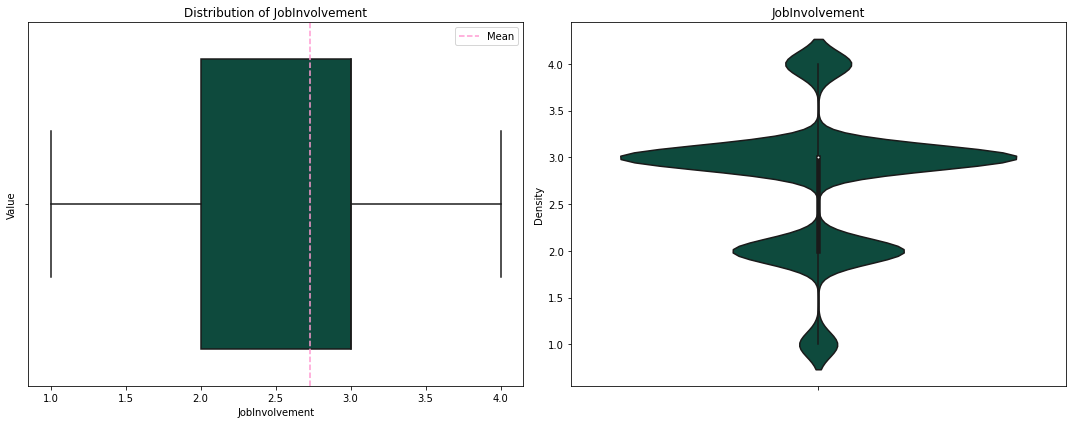

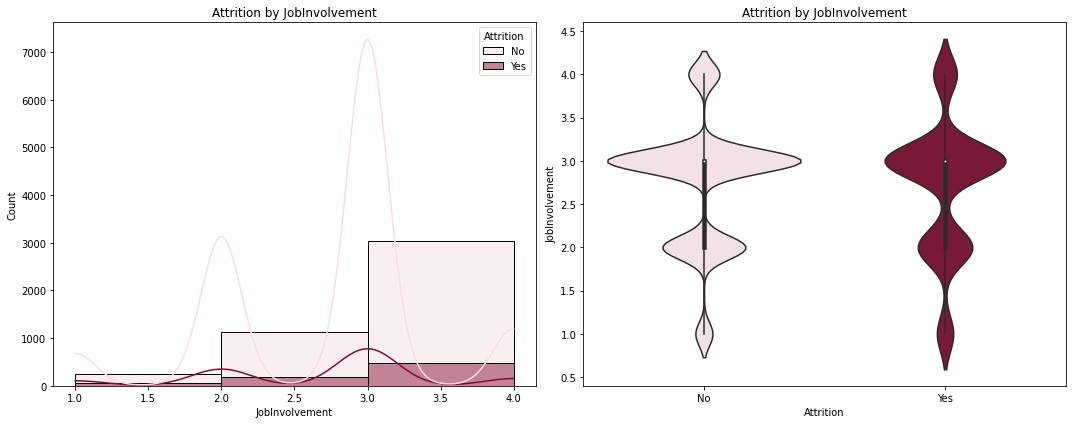

In [92]:
            ### Performance Rating ###
num_var_plots(df=mng_survey_ds, num_column='JobInvolvement', hue='Attrition', palette=['#045443'])

<div style="border-radius:10px; border:#7F7F7F solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#595959'>💡 <b>Performance Rating Insights</b></font></h3>

<ul style="color: #333333;">
    <li>The <b>average performance rating is approximately 3.15</b>, with a <b>standard deviation of 0.36</b>, indicating <b>low variability</b> in employees' performance ratings.</li>
    <br>
    <li>The <b>minimum performance rating of 3</b> suggests that all employees have at least a "Better" performance rating, while the <b>maximum of 4</b> indicates employees with the "Best" performance rating.</li>
    <br>
    <li>Quartile information shows that <b>all employees have a performance rating of "Better" or higher</b>. Understanding performance ratings is crucial for evaluating employee performance, setting goals, and making decisions about promotions and rewards.</li>
</ul>
</div>
